In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# % matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
resses = cv2.imread('DATA/reeses_puffs.png',0)

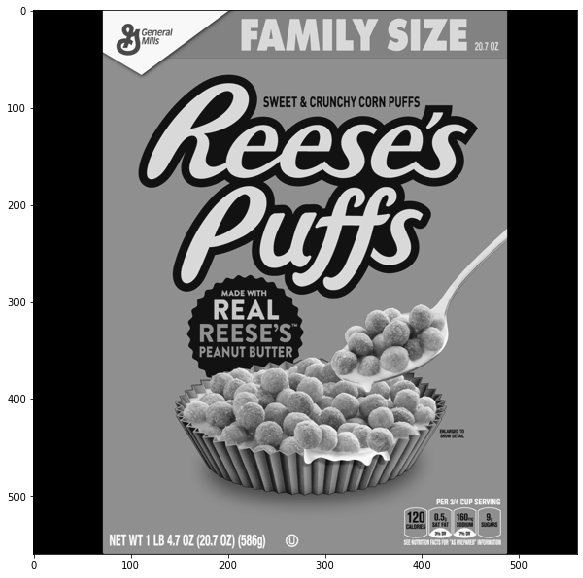

In [4]:
display(resses)

In [5]:
# target image
cereals = cv2.imread('DATA/many_cereals.jpg',0)

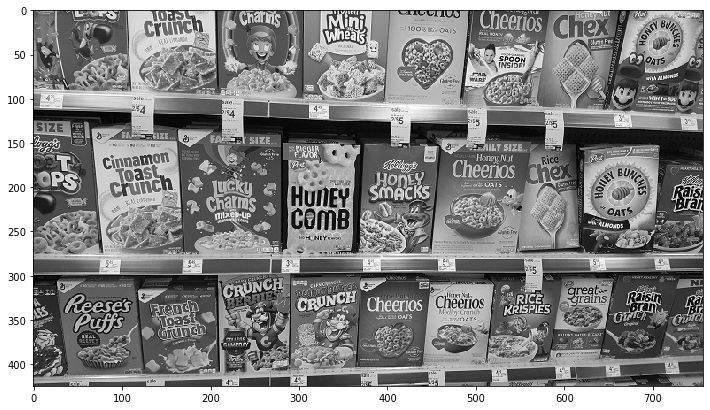

In [6]:
display(cereals)

In [7]:
# 1st method 
# Brute-force matching with orb discriptors

In [8]:
# detector object
orb = cv2.ORB_create()
# find keypoints and discriptors of this object

In [9]:
# find keypoints and discriptors of this object
kp1,des1 = orb.detectAndCompute(resses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [10]:
kp1

[<KeyPoint 00000272F1142B10>,
 <KeyPoint 00000272F1142FC0>,
 <KeyPoint 00000272F1142C90>,
 <KeyPoint 00000272F1142DB0>,
 <KeyPoint 00000272F1142DE0>,
 <KeyPoint 00000272F1765450>,
 <KeyPoint 00000272F1765510>,
 <KeyPoint 00000272F17655D0>,
 <KeyPoint 00000272F1765030>,
 <KeyPoint 00000272F1765240>,
 <KeyPoint 00000272F17654E0>,
 <KeyPoint 00000272F17650F0>,
 <KeyPoint 00000272F17655A0>,
 <KeyPoint 00000272F1765540>,
 <KeyPoint 00000272F17656C0>,
 <KeyPoint 00000272F1765660>,
 <KeyPoint 00000272F1765600>,
 <KeyPoint 00000272F1765630>,
 <KeyPoint 00000272F1765750>,
 <KeyPoint 00000272F1765720>,
 <KeyPoint 00000272F1765780>,
 <KeyPoint 00000272F1765810>,
 <KeyPoint 00000272F17657B0>,
 <KeyPoint 00000272F17657E0>,
 <KeyPoint 00000272F1765840>,
 <KeyPoint 00000272F1765870>,
 <KeyPoint 00000272F17658A0>,
 <KeyPoint 00000272F17658D0>,
 <KeyPoint 00000272F1765900>,
 <KeyPoint 00000272F1765930>,
 <KeyPoint 00000272F1765960>,
 <KeyPoint 00000272F1765990>,
 <KeyPoint 00000272F17659C0>,
 <KeyPoint

In [11]:
des1

array([[163,  42, 226, ..., 141, 123, 132],
       [ 92,  65, 134, ..., 251,  48,   0],
       [ 17, 205,  73, ..., 136, 240,  40],
       ...,
       [ 40, 153, 252, ..., 235,  72, 154],
       [ 40, 150, 112, ..., 142, 198, 210],
       [ 90, 162,  53, ...,   6,  45,  72]], dtype=uint8)

In [12]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [13]:
matches = bf.match(des1,des2)

In [14]:
len(matches)

136

In [15]:
single_match = matches[0]

In [16]:
single_match

<DMatch 00000272F14E14F0>

In [17]:
single_match.distance  # checkout other method of it with single_match. and tab it
# less distance it has it beeter match
# more disance it has worst match

54.0

In [18]:
matches = sorted( matches, key=lambda x:x.distance )

In [19]:
ress_match = cv2.drawMatches(resses,kp1,cereals,kp2,matches[:25],None,flags=2)

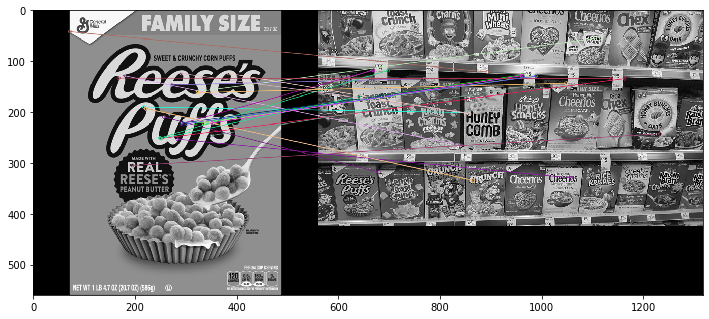

In [20]:
display(ress_match)

In [21]:
# 2nd method
# Brute-force matching with sift (scale invarient feature transform) discriptors and ratio test
# it does really work well when we are dealing with image size are at a diffrent scale

In [26]:
sift = cv2.xfeatures2d.SIFT_create()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'
